In [ ]:
import pandas as pd
import numpy as np
import os
import graphviz
from sklearn.metrics import confusion_matrix, plot_confusion_matrix
import matplotlib.pyplot as plt
from sklearn.metrics import classification_report
from sklearn import tree

#### Part 0: Initalize and Load data

In [ ]:
from google.colab import drive

# drive.mount('/content/drive/')
drive.mount("/content/drive/", force_remount=True)

Mounted at /content/drive/


In [ ]:
os.chdir('./drive/MyDrive/ML DS539/CoLab')

In [ ]:
training = pd.read_csv("training.csv", index_col = "Unnamed: 0")
testing = pd.read_csv("testing.csv", index_col = "Unnamed: 0")

In [ ]:
training.head()

,Alabama,Alaska,Arizona,Arkansas,California,Colorado,Connecticut,Delaware,District of Columbia,Florida,Georgia,Hawaii,Idaho,Illinois,Indiana,Iowa,Kansas,Kentucky,Louisiana,Maine,Maryland,Massachusetts,Michigan,Minnesota,Mississippi,Missouri,Montana,Nebraska,Nevada,New Hampshire,New Jersey,New Mexico,New York,North Carolina,North Dakota,Ohio,Oklahoma,Oregon,Pennsylvania,Rhodes Island,...,parent_count,parent_rate,other_family_count,other_family_rate,Blunt Object_count,Blunt Object_rate,Strangulation_count,Strangulation_rate,Unknown_count,Unknown_rate,Rifle_count,Rifle_rate,Knife_count,Knife_rate,Firearm_count,Firearm_rate,Shotgun_count,Shotgun_rate,Fall_count,Fall_rate,Handgun_count,Handgun_rate,Drowning_count,Drowning_rate,Suffocation_count,Suffocation_rate,Explosives_count,Explosives_rate,Fire_count,Fire_rate,Drugs_count,Drugs_rate,Gun_count,Gun_rate,Poison_count,Poison_rate,Crime Rate,Top_10,Next_Year_Top_10,Next_Year_Crime_Rate
0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,...,0.0,0.000000,1.0,0.021277,4.0,0.085106,2.0,0.042553,5.0,0.106383,15.0,0.319149,5.0,0.106383,4.0,0.085106,2.0,0.042553,1.0,0.021277,8.0,0.170213,1.0,0.021277,0.0,0.000000,0.0,0.0,0.0,0.000000,0.0,0.0,0.0,0.0,0.0,0.0,11.595919,1,1.0,16.487810
1,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,...,4.0,0.057971,1.0,0.014493,1.0,0.014493,2.0,0.028986,2.0,0.028986,15.0,0.217391,7.0,0.101449,1.0,0.014493,10.0,0.144928,0.0,0.000000,27.0,0.391304,2.0,0.028986,1.0,0.014493,0.0,0.0,1.0,0.014493,0.0,0.0,0.0,0.0,0.0,0.0,16.487810,1,1.0,16.681272
2,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,...,1.0,0.013333,3.0,0.040000,7.0,0.093333,3.0,0.040000,4.0,0.053333,11.0,0.146667,9.0,0.120000,2.0,0.026667,2.0,0.026667,0.0,0.000000,36.0,0.480000,0.0,0.000000,0.0,0.000000,0.0,0.0,1.0,0.013333,0.0,0.0,0.0,0.0,0.0,0.0,16.681272,1,1.0,15.150988
3,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,...,4.0,0.054054,4.0,0.054054,6.0,0.081081,2.0,0.027027,5.0,0.067568,16.0,0.216216,11.0,0.148649,1.0,0.013514,11.0,0.148649,0.0,0.000000,22.0,0.297297,0.0,0.000000,0.0,0.000000,0.0,0.0,0.0,0.000000,0.0,0.0,0.0,0.0,0.0,0.0,15.150988,1,1.0,10.122600
4,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,...,3.0,0.057692,0.0,0.000000,5.0,0.096154,2.0,0.038462,1.0,0.019231,11.0,0.211538,7.0,0.134615,0.0,0.000000,2.0,0.038462,0.0,0.000000,22.0,0.423077,0.0,0.000000,0.0,0.000000,0.0,0.0,2.0,0.038462,0.0,0.0,0.0,0.0,0.0,0.0,10.122600,1,1.0,9.389760


In [ ]:
training = training.drop(["state", "Next_Year_Crime_Rate"], axis=1)
testing = testing.drop(["state", "Next_Year_Crime_Rate"], axis=1)

In [ ]:
X_train = training.drop(["Next_Year_Top_10"], axis=1)
X_test = testing.drop(["Next_Year_Top_10"], axis=1)

y_train = training["Next_Year_Top_10"]
y_test = testing["Next_Year_Top_10"]

In [ ]:
X_train["year"] = [(1 + (i-1980)) for i in X_train["year"]]
X_test["year"] = [(1 + (i-1980)) for i in X_test["year"]]

In [ ]:
X_train["year"]

0        1.0
1        2.0
2        3.0
3        4.0
4        5.0
        ... 
1774    25.0
1775    26.0
1776    27.0
1777    28.0
1778    29.0
Name: year, Length: 1479, dtype: float64

#### Part 1: Basic Decision Tree


In [ ]:
clf_1 = tree.DecisionTreeClassifier()
clf_1 = clf_1.fit(X_train, y_train)

In [ ]:
dot_data = tree.export_graphviz(clf_1, out_file=None, 
                                feature_names=X_test.columns,
                                class_names=["Not Top 10", "Top 10"],  
                                 filled=True, rounded=True,
                                special_characters=True)  
graph = graphviz.Source(dot_data)  
graph.render(filename = 'tree_1')

'tree_1.pdf'

In [ ]:
# graph

/usr/local/lib/python3.7/dist-packages/sklearn/utils/deprecation.py:87: FutureWarning: Function plot_confusion_matrix is deprecated; Function `plot_confusion_matrix` is deprecated in 1.0 and will be removed in 1.2. Use one of the class methods: ConfusionMatrixDisplay.from_predictions or ConfusionMatrixDisplay.from_estimator.
  warnings.warn(msg, category=FutureWarning)


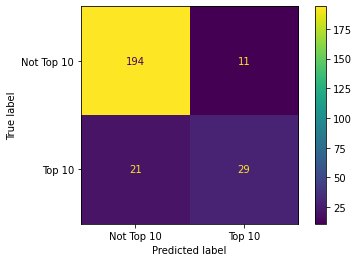

In [ ]:
plot_confusion_matrix(clf_1, X_test, y_test, display_labels= ["Not Top 10", "Top 10"])

In [ ]:
print(classification_report(y_test, clf_1.predict(X_test), target_names= ["Not Top 10", "Top 10"]))

              precision    recall  f1-score   support

  Not Top 10       0.90      0.95      0.92       205
      Top 10       0.72      0.58      0.64        50

    accuracy                           0.87       255
   macro avg       0.81      0.76      0.78       255
weighted avg       0.87      0.87      0.87       255



#### Part 1-2: Basic Decision Tree: Entropy


In [ ]:
clf_1 = tree.DecisionTreeClassifier(criterion = "entropy")
clf_1 = clf_1.fit(X_train, y_train)

In [ ]:
dot_data = tree.export_graphviz(clf_1, out_file=None, 
                                feature_names=X_test.columns,
                                class_names=["Not Top 10", "Top 10"],  
                                 filled=True, rounded=True,
                                special_characters=True)  
graph = graphviz.Source(dot_data)  
graph.render(filename = 'tree_1_entropy')

'tree_1_entropy.pdf'

In [ ]:
# graph

/usr/local/lib/python3.7/dist-packages/sklearn/utils/deprecation.py:87: FutureWarning: Function plot_confusion_matrix is deprecated; Function `plot_confusion_matrix` is deprecated in 1.0 and will be removed in 1.2. Use one of the class methods: ConfusionMatrixDisplay.from_predictions or ConfusionMatrixDisplay.from_estimator.
  warnings.warn(msg, category=FutureWarning)


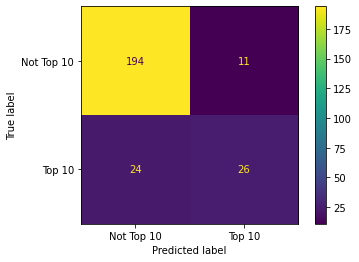

In [ ]:
plot_confusion_matrix(clf_1, X_test, y_test, display_labels= ["Not Top 10", "Top 10"])

In [ ]:
print(classification_report(y_test, clf_1.predict(X_test), target_names= ["Not Top 10", "Top 10"]))

              precision    recall  f1-score   support

  Not Top 10       0.89      0.95      0.92       205
      Top 10       0.70      0.52      0.60        50

    accuracy                           0.86       255
   macro avg       0.80      0.73      0.76       255
weighted avg       0.85      0.86      0.85       255



####Part 2: Fine Tunning with ccp_alpha

"Greater values of ccp_alpha increase the number of nodes pruned"

Nodes with the smallest alpha are the weakest node, so are pruned first

code source: https://scikit-learn.org/stable/auto_examples/tree/plot_cost_complexity_pruning.html

In [ ]:
#need training and validation set for this:

from sklearn.model_selection import train_test_split
X_train_1, X_val, y_train_1, y_val = train_test_split(X_train, y_train, random_state=0)

In [ ]:
clf = tree.DecisionTreeClassifier(random_state=0)
path = clf.cost_complexity_pruning_path(X_train_1, y_train_1)
ccp_alphas, impurities = path.ccp_alphas, path.impurities

Text(0.5, 1.0, 'Total Impurity vs effective alpha for training set')

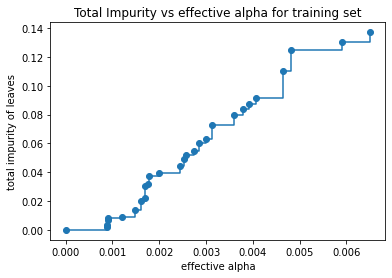

In [ ]:
fig, ax = plt.subplots()
ax.plot(ccp_alphas[:-1], impurities[:-1], marker="o", drawstyle="steps-post")
ax.set_xlabel("effective alpha")
ax.set_ylabel("total impurity of leaves")
ax.set_title("Total Impurity vs effective alpha for training set")

In [ ]:
clfs = []
for ccp_alpha in ccp_alphas:
    clf = tree.DecisionTreeClassifier(random_state=0, ccp_alpha=ccp_alpha)
    clf.fit(X_train_1, y_train_1)
    clfs.append(clf)
print(
    "Number of nodes in the last tree is: {} with ccp_alpha: {}".format(
        clfs[-1].tree_.node_count, ccp_alphas[-1]
    )
)

Number of nodes in the last tree is: 1 with ccp_alpha: 0.17659908982403538


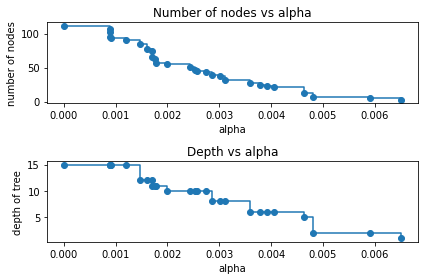

In [ ]:
clfs = clfs[:-1]
ccp_alphas = ccp_alphas[:-1]

node_counts = [clf.tree_.node_count for clf in clfs]
depth = [clf.tree_.max_depth for clf in clfs]
fig, ax = plt.subplots(2, 1)
ax[0].plot(ccp_alphas, node_counts, marker="o", drawstyle="steps-post")
ax[0].set_xlabel("alpha")
ax[0].set_ylabel("number of nodes")
ax[0].set_title("Number of nodes vs alpha")
ax[1].plot(ccp_alphas, depth, marker="o", drawstyle="steps-post")
ax[1].set_xlabel("alpha")
ax[1].set_ylabel("depth of tree")
ax[1].set_title("Depth vs alpha")
fig.tight_layout()

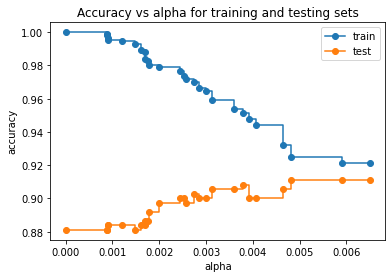

In [ ]:
train_scores = [clf.score(X_train_1, y_train_1) for clf in clfs]
test_scores = [clf.score(X_val, y_val) for clf in clfs]

fig, ax = plt.subplots()
ax.set_xlabel("alpha")
ax.set_ylabel("accuracy")
ax.set_title("Accuracy vs alpha for training and testing sets")
ax.plot(ccp_alphas, train_scores, marker="o", label="train", drawstyle="steps-post")
ax.plot(ccp_alphas, test_scores, marker="o", label="test", drawstyle="steps-post")
ax.legend()
plt.show()

alpha value of 0.005 is the best based on this anaylsis

In [ ]:
clf_2 = tree.DecisionTreeClassifier

In [ ]:
clf_2 = tree.DecisionTreeClassifier(ccp_alpha = 0.005)
clf_2 = clf_1.fit(X_train, y_train)

In [ ]:
dot_data = tree.export_graphviz(clf_2, out_file=None, 
                                feature_names=X_test.columns,
                                class_names=["Not Top 10", "Top 10"],  
                                 filled=True, rounded=True,
                                special_characters=True)  
graph = graphviz.Source(dot_data)  
graph.render(filename = 'tree_2')

'tree_2.pdf'

In [ ]:
# graph

/usr/local/lib/python3.7/dist-packages/sklearn/utils/deprecation.py:87: FutureWarning: Function plot_confusion_matrix is deprecated; Function `plot_confusion_matrix` is deprecated in 1.0 and will be removed in 1.2. Use one of the class methods: ConfusionMatrixDisplay.from_predictions or ConfusionMatrixDisplay.from_estimator.
  warnings.warn(msg, category=FutureWarning)


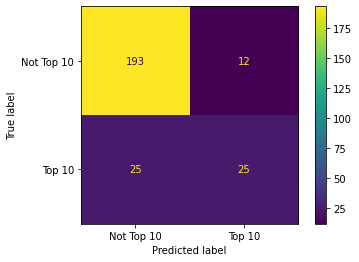

In [ ]:
plot_confusion_matrix(clf_2, X_test, y_test, display_labels= ["Not Top 10", "Top 10"])

In [ ]:
print(classification_report(y_test, clf_2.predict(X_test), target_names= ["Not Top 10", "Top 10"]))

              precision    recall  f1-score   support

  Not Top 10       0.89      0.94      0.91       205
      Top 10       0.68      0.50      0.57        50

    accuracy                           0.85       255
   macro avg       0.78      0.72      0.74       255
weighted avg       0.84      0.85      0.85       255



####Part 2-2: Fine Tunning with ccp_alpha w/ entropy

In [ ]:
clf = tree.DecisionTreeClassifier(random_state=0, criterion="entropy")
path = clf.cost_complexity_pruning_path(X_train_1, y_train_1)
ccp_alphas, impurities = path.ccp_alphas, path.impurities

Text(0.5, 1.0, 'Total Impurity vs effective alpha for training set')

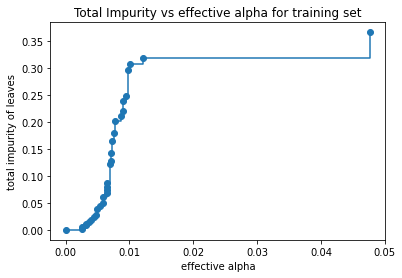

In [ ]:
fig, ax = plt.subplots()
ax.plot(ccp_alphas[:-1], impurities[:-1], marker="o", drawstyle="steps-post")
ax.set_xlabel("effective alpha")
ax.set_ylabel("total impurity of leaves")
ax.set_title("Total Impurity vs effective alpha for training set")

In [ ]:
clfs = []
for ccp_alpha in ccp_alphas:
    clf = tree.DecisionTreeClassifier(random_state=0, ccp_alpha=ccp_alpha)
    clf.fit(X_train_1, y_train_1)
    clfs.append(clf)
print(
    "Number of nodes in the last tree is: {} with ccp_alpha: {}".format(
        clfs[-1].tree_.node_count, ccp_alphas[-1]
    )
)

Number of nodes in the last tree is: 1 with ccp_alpha: 0.34481905831318826


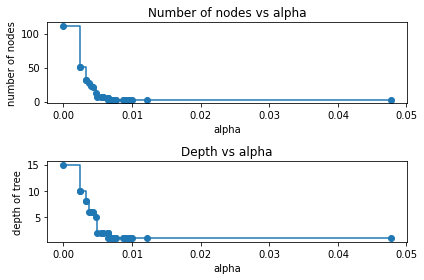

In [ ]:
clfs = clfs[:-1]
ccp_alphas = ccp_alphas[:-1]

node_counts = [clf.tree_.node_count for clf in clfs]
depth = [clf.tree_.max_depth for clf in clfs]
fig, ax = plt.subplots(2, 1)
ax[0].plot(ccp_alphas, node_counts, marker="o", drawstyle="steps-post")
ax[0].set_xlabel("alpha")
ax[0].set_ylabel("number of nodes")
ax[0].set_title("Number of nodes vs alpha")
ax[1].plot(ccp_alphas, depth, marker="o", drawstyle="steps-post")
ax[1].set_xlabel("alpha")
ax[1].set_ylabel("depth of tree")
ax[1].set_title("Depth vs alpha")
fig.tight_layout()

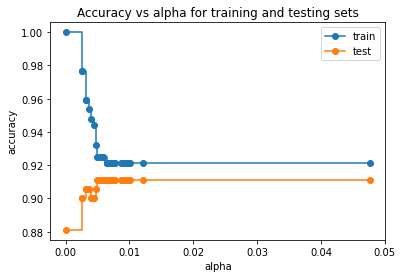

In [ ]:
train_scores = [clf.score(X_train_1, y_train_1) for clf in clfs]
test_scores = [clf.score(X_val, y_val) for clf in clfs]

fig, ax = plt.subplots()
ax.set_xlabel("alpha")
ax.set_ylabel("accuracy")
ax.set_title("Accuracy vs alpha for training and testing sets")
ax.plot(ccp_alphas, train_scores, marker="o", label="train", drawstyle="steps-post")
ax.plot(ccp_alphas, test_scores, marker="o", label="test", drawstyle="steps-post")
ax.legend()
plt.show()

alpha value of 0.01 is the best based on this anaylsis

In [ ]:
clf_2 = tree.DecisionTreeClassifier(ccp_alpha = 0.01, criterion="entropy")
clf_2 = clf_1.fit(X_train, y_train)

In [ ]:
dot_data = tree.export_graphviz(clf_2, out_file=None, 
                                feature_names=X_test.columns,
                                class_names=["Not Top 10", "Top 10"],  
                                 filled=True, rounded=True,
                                special_characters=True)  
graph = graphviz.Source(dot_data)  
graph.render(filename = 'tree_2_entropy')

'tree_2_entropy.pdf'

In [ ]:
# graph

/usr/local/lib/python3.7/dist-packages/sklearn/utils/deprecation.py:87: FutureWarning: Function plot_confusion_matrix is deprecated; Function `plot_confusion_matrix` is deprecated in 1.0 and will be removed in 1.2. Use one of the class methods: ConfusionMatrixDisplay.from_predictions or ConfusionMatrixDisplay.from_estimator.
  warnings.warn(msg, category=FutureWarning)


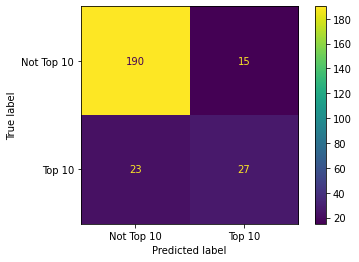

In [ ]:
plot_confusion_matrix(clf_2, X_test, y_test, display_labels= ["Not Top 10", "Top 10"])

In [ ]:
print(classification_report(y_test, clf_2.predict(X_test), target_names= ["Not Top 10", "Top 10"]))

              precision    recall  f1-score   support

  Not Top 10       0.88      0.96      0.92       205
      Top 10       0.72      0.46      0.56        50

    accuracy                           0.86       255
   macro avg       0.80      0.71      0.74       255
weighted avg       0.85      0.86      0.85       255



#### Part 3: Fine Tunning with just Tree Depth 

In [ ]:
clfs = []
tree_depths = [i for i in range(1, 17)]
for tree_depth in tree_depths:
    clf = tree.DecisionTreeClassifier(random_state=0, max_depth=tree_depth)
    clf.fit(X_train_1, y_train_1)
    clfs.append(clf)

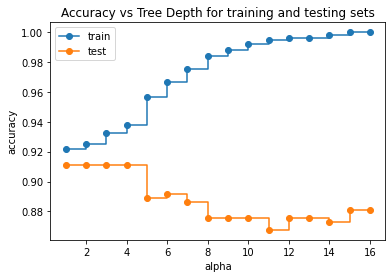

In [ ]:
train_scores = [clf.score(X_train_1, y_train_1) for clf in clfs]
test_scores = [clf.score(X_val, y_val) for clf in clfs]

fig, ax = plt.subplots()
ax.set_xlabel("alpha")
ax.set_ylabel("accuracy")
ax.set_title("Accuracy vs Tree Depth for training and testing sets")
ax.plot(tree_depths, train_scores, marker="o", label="train", drawstyle="steps-post")
ax.plot(tree_depths, test_scores, marker="o", label="test", drawstyle="steps-post")
ax.legend()
plt.show()

Based on this result, the best tree depth is 4

In [ ]:
clf_3 = tree.DecisionTreeClassifier

In [ ]:
clf_3 = tree.DecisionTreeClassifier(max_depth = 4)
clf_3 = clf_3.fit(X_train, y_train)

In [ ]:
dot_data = tree.export_graphviz(clf_3, out_file=None, 
                                feature_names=X_test.columns,
                                class_names=["Not Top 10", "Top 10"],  
                                 filled=True, rounded=True,
                                special_characters=True)  
graph = graphviz.Source(dot_data)  
graph.render(filename = 'tree_3')

'tree_3.pdf'

In [ ]:
# graph

/usr/local/lib/python3.7/dist-packages/sklearn/utils/deprecation.py:87: FutureWarning: Function plot_confusion_matrix is deprecated; Function `plot_confusion_matrix` is deprecated in 1.0 and will be removed in 1.2. Use one of the class methods: ConfusionMatrixDisplay.from_predictions or ConfusionMatrixDisplay.from_estimator.
  warnings.warn(msg, category=FutureWarning)


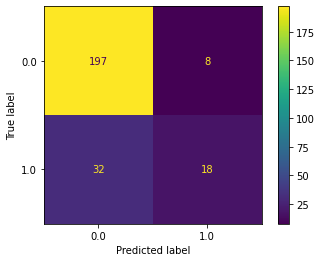

In [ ]:
plot_confusion_matrix(clf_3, X_test, y_test, display_labels= ["Not Top 10", "Top 10"])

In [ ]:
print(classification_report(y_test, clf_3.predict(X_test), target_names= ["Not Top 10", "Top 10"]))

              precision    recall  f1-score   support

  Not Top 10       0.86      0.96      0.91       205
      Top 10       0.69      0.36      0.47        50

    accuracy                           0.84       255
   macro avg       0.78      0.66      0.69       255
weighted avg       0.83      0.84      0.82       255



#### Part 3-2: Fine Tunning with just Tree Depth w/entropy

In [ ]:
clfs = []
tree_depths = [i for i in range(1, 17)]
for tree_depth in tree_depths:
    clf = tree.DecisionTreeClassifier(random_state=0, max_depth=tree_depth, criterion = "entropy")
    clf.fit(X_train_1, y_train_1)
    clfs.append(clf)

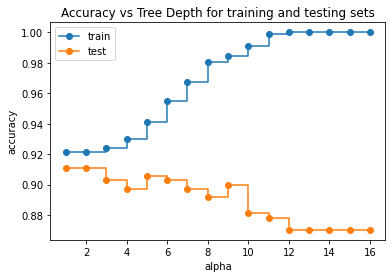

In [ ]:
train_scores = [clf.score(X_train_1, y_train_1) for clf in clfs]
test_scores = [clf.score(X_val, y_val) for clf in clfs]

fig, ax = plt.subplots()
ax.set_xlabel("alpha")
ax.set_ylabel("accuracy")
ax.set_title("Accuracy vs Tree Depth for training and testing sets")
ax.plot(tree_depths, train_scores, marker="o", label="train", drawstyle="steps-post")
ax.plot(tree_depths, test_scores, marker="o", label="test", drawstyle="steps-post")
ax.legend()
plt.show()

Based on this result, the best tree depth is 3

In [ ]:
clf_3 = tree.DecisionTreeClassifier(max_depth = 3, criterion="entropy")
clf_3 = clf_3.fit(X_train, y_train)

In [ ]:
dot_data = tree.export_graphviz(clf_3, out_file=None, 
                                feature_names=X_test.columns,
                                class_names=["Not Top 10", "Top 10"],  
                                 filled=True, rounded=True,
                                special_characters=True)  
graph = graphviz.Source(dot_data)  
graph.render(filename = 'tree_3_entropy')

'tree_3_entropy.pdf'

In [ ]:
# graph

/usr/local/lib/python3.7/dist-packages/sklearn/utils/deprecation.py:87: FutureWarning: Function plot_confusion_matrix is deprecated; Function `plot_confusion_matrix` is deprecated in 1.0 and will be removed in 1.2. Use one of the class methods: ConfusionMatrixDisplay.from_predictions or ConfusionMatrixDisplay.from_estimator.
  warnings.warn(msg, category=FutureWarning)


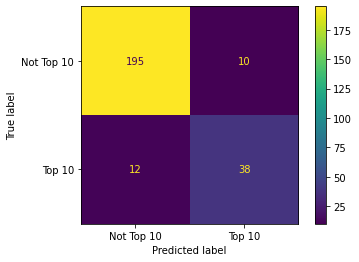

In [ ]:
plot_confusion_matrix(clf_3, X_test, y_test, display_labels= ["Not Top 10", "Top 10"])

In [ ]:
print(classification_report(y_test, clf_3.predict(X_test), target_names= ["Not Top 10", "Top 10"]))

              precision    recall  f1-score   support

  Not Top 10       0.94      0.95      0.95       205
      Top 10       0.79      0.76      0.78        50

    accuracy                           0.91       255
   macro avg       0.87      0.86      0.86       255
weighted avg       0.91      0.91      0.91       255

